<h2 align="center">Iterative Methods for Solving Equations</h2> 

Solving differential equations numerically can often be much faster than doing so analytically.  The Euler-Cromer method provides a simple solution to solving equations.  Read pages 1-5 of <a href="https://moodle.swarthmore.edu/mod/resource/view.php?id=229824">the PDF provided on Moodle</a> for the basic background information on this method, which we'll use in today's lesson.

Once you've finished that, look at the code below.

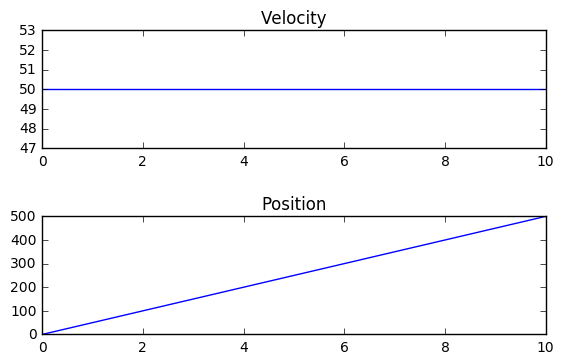

In [1]:
%matplotlib inline
import matplotlib.pyplot as mp

def EulerCromer(tfinal, dt, v0):
    '''Euler-Cromer method, takes tfinal (final time), dt (time step), 
    and v0 (initial velocity) as arguments'''
    t = 0 # initial time
    y = 0 # initial position
    a = 0 # no acceleration
    v = v0 # initial velocity

    # Set up position, velocity, and time arrays, initially with one
    # entry each:
    time = [t] 
    ypos = [y] 
    yvel = [v]
    
    while t <= tfinal - dt: # Update variables using Eqs. (1) & (2) 
        v = v + a * dt #increment velocity
        # Note that this uses the *new* v we just defined in prev. step
        y = y + v * dt #increment position

        # Add updated variables to the lists 
        yvel.append(v) 
        ypos.append(y)

        # Increment time 
        t = t + dt 
        time.append(t)
        
    #plot results
    %matplotlib inline
    import matplotlib.pyplot as mp
    mp.subplot(2,1,1)
    mp.plot(time,yvel)
    mp.title("Velocity")
    mp.subplot(2,1,2)
    mp.plot(time,ypos)
    mp.title("Position")
    mp.tight_layout(pad=2)
    mp.show()
    
EulerCromer(10,0.1,50)

These plots show the velocity and position of an object moving at zero accceleration.  This is not particularly interesting.  But the nice thing about solving equations numerically is that it makes it relatively simple to add other effects, which in some cases can be difficult to build into an analytic solution.

*Note:*  In the exercises below, you will write successively more realistic versions of the algorithm above.  For each case, write a new function, copying and pasting code as necessary from your previous cell(s).  Give each new function a different name so that there is no confusion about which function your code is calling.  You may work with numpy arrays instead of lists if you prefer.

**Exercise 1** Create a modified version of the code above that includes Earth's gravity.  The acceleration, $a$, will no longer be a constant.  The force of gravity on an object near earth is given by $F = G m M_E / r^2$ where $G = 6.674 \times 10^{-11}$ in SI units and the mass of Earth is $M_E = 5.972 \times 10^{24}$ kg.  Use the radius of the Earth, $R_E = y=6.371 \times 10^6$ m as your starting `y`.  Write your code as a function that takes as an argument the mass of the object, an initial velocity, and a final time.

**Exercise 2** Make a modified version of your code such that the function stops if the object has returned to Earth.  Have the function print the time and speed at which it landed.

**Exercise 3** Modify your code to now include drag.  Quadratic air drag in one dimension can be approximated as an additional acceleration, with a magnitude of $ a_{drag} = \frac{1}{2m} C_D \rho A v^2$ (where $C_D = 0.5$ and $\rho=1.3$ approximately on Earth) and a direction that is *opposite the direction of the velocity*.  Your function should take $A$, the cross-sectional area of the object, as an argument.  For your final test case to turn in, use $A = 1\, m^2$, but play around with other areas to see the effect.  (As you're doing this, think about what physical objects might have the mass and cross-sectional area you're using, and how easy or hard it would be to set them going with a given initial velocity.) 

**Exercise 4** Modify the code again to model a rocket engine, which loses mass as it moves.  The force of the rocket is given by $m a = V (dm/dt)$ with $V$ given by the specific impulse of the rocket fuel, $V = \tau g$ ($g$ is the acceleration of gravity). Use the data available on Wikipedia to find $dm/dt$ and $V$ for the first rocket stage. Plot the rocket's motion during the first-stage burn (keep in mind that you will want to run this calculation for the second stage as well).  What altitude could be reached before the first stage was jettisoned?

**Exercise 5** Modify your code again to include the exponential decrease in the density of the air ($\rho$) with altitude. Use $\rho_0 = 1.3\,$kg/m$^3$ at Earth's surface and a scale height of 8 km.  How does this affect the maximum altitude attained by the first-stage burn?

**Exercise 6** Use and/or modify your solution to Exercise 5 to simulate the second-stage burn, starting where the first stage was jettisoned (at the end of the burn time).  Show the maximum altitude and plot the entire trajectory.

**Exercise 7** Determine approximately (within about an order of magnitude) how much mass the Saturn V lifted into low Earth orbit.  The Mercury 6 mission with John Glenn in 1962 circled the earth with a perigee of 161 km.  At this altitude, you need a velocity of about 7.8 km/s to remain in orbit (approximately John Glenn's top speed during the orbit). You may want to do this by revising the stop condition in Exercise 2 to stop when it reaches 161 km..

One of the most common systems we encounter, both in models and in real systems, is the oscillator.  The simple harmonic oscillator is what we commonly use in class, but it's not a great model for a real spring unless the oscillations are very small.  In the next set of exercises, you will develop and solve a more realistic model for oscillations of a mass on a spring.

**Exercise 4** Implement the Euler-Cromer method to solve for the motion of a mass on a frictionless surface that is connected to a wall by an ideal Hooke's Law spring.  Formulate your equations in terms of the normalized displacement, $x/L$, so that your initial position will be in the interval $[0,1)$.  Plot the position and velocity as functions of time, and make a "phase portrait" plot of $v(t)$ versus $x(t)$.  Check your result against what you know about the simple harmonic oscillator.  What happens if you choose a time step that is too large (use a number that does not divide evenly by the oscillation period)?  

Natural frequency 1.00
Number of oscillations per time step: 1/w_osc*dt = 10.000


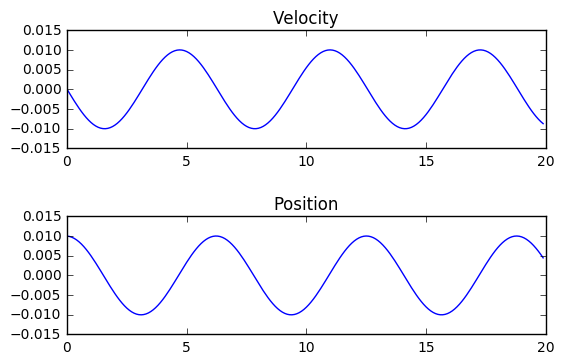

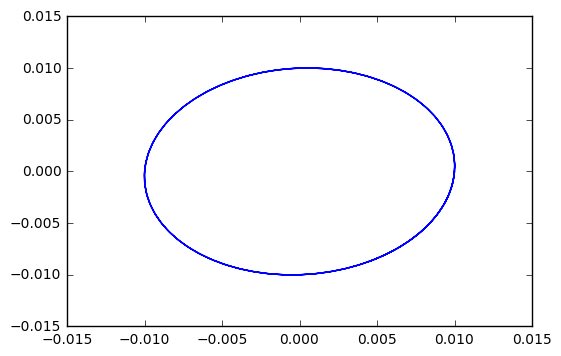

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mp

def EulerCromerSHO(tfinal, dt, x0=0.01, v0=0., w0 = 100):
    '''Euler-Cromer method, takes tfinal (final time), dt (time step), 
    and v0 (initial velocity) as arguments'''
    
    
    print("Natural frequency %2.2f"%(w0))
    print("Number of oscillations per time step: 1/w_osc*dt = %5.3f"%(1./(w0*dt)))
    
    t = 0 # initial time
    y = 0 # initial position
    x = x0 # initial position (cannot be larger than L)
    v = v0 # initial velocity
    a = -w0**2*x # initial acceleration
    
    # Set up position, velocity, and time arrays (actually lists, for easy appending), 
    # initially with one entry each:
    time = [t] 
    xpos = [x] 
    xvel = [v]
    xacc = [a]
    
    while t <= tfinal - dt: # Update variables using Eqs. (1) & (2) 
        v = v + a * dt #increment velocity
        # Note that this uses the *new* v we just defined in prev. step
        x = x + v * dt #increment position
        a = -w0**2*x #increment acceleration
        
        # Add updated variables to the lists 
        xvel.append(v) 
        xpos.append(x)
        xacc.append(a)

        # Increment time 
        t = t + dt 
        time.append(t)
        
    return np.array(time),np.array(xpos),np.array(xvel)


def plot_osc(t,x,v):
    #plot results
    mp.subplot(2,1,1)
    mp.plot(t,v)
    mp.title("Velocity")
    mp.subplot(2,1,2)
    mp.plot(t,x)
    mp.title("Position")
    mp.tight_layout(pad=2)
    mp.show()
    mp.plot(x,v,)
    #ax = mp.gca()
    #ax.set_aspect(x.max()/v.max())
    mp.show()

w0 = 1.
dt = 0.1/w0 # number of oscillations per time step = w0*dt
#Try $\Delta t = pi/\omega_0$ to see blow up
t,x,v = EulerCromerSHO(20,dt,x0=0.01,w0=w0)
plot_osc(t,x,v)


**Exercise 5** Real springs can't maintain a linear (Hooke's Law) restoring force as the extension or compression gets to be of the order of the equilibrium length of the spring. As first step towards a more realistic model, add an additional force term $\epsilon\omega_0^2 x^3$ to your oscillator, making sure the sign is such that the force gets stronger as the displacement increases (a "hard" spring).  Plot the position on the same axes as the position of a SHO with the same natural frequency for each of the following cases:

* $\epsilon=1$, $x_0/L$ = 0.1
* $\epsilon=1$, $x_0/L$ = 0.9
* $\epsilon=10$, $x_0/L$ = 0.1
* $\epsilon=10$, $x_0/L$ = 0.9

Do the same for the velocity.  Note the distorion from sinusoidal motion as the nonlinearity becomes significant.  What happens to the frequency as the amplitude increases?  What does this mean for the time step you must choose?

Natural frequency 1.00
Number of oscillations per time step: 1/w_osc*dt = 10.000
Natural frequency 1.00
Number of oscillations per time step: 1/w_osc*dt = 10.000


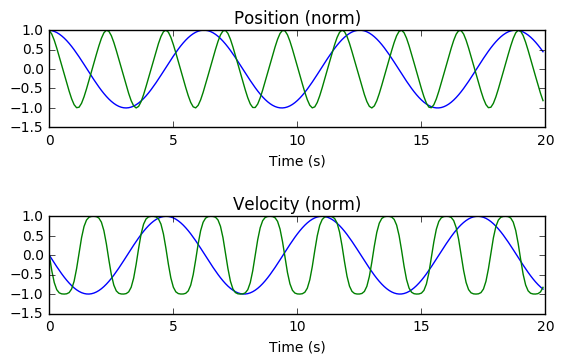

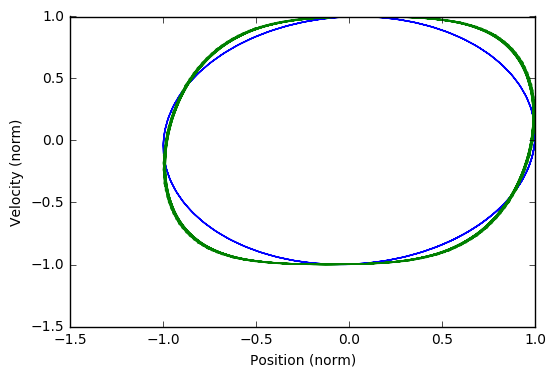

In [3]:
def EulerCromerDuffing(tfinal, dt, x0=0.01, v0=0., w0=1., epsilon=0.1):
    '''Euler-Cromer method, takes tfinal (final time), dt (time step), 
    and v0 (initial velocity) as arguments'''
    
    
    print("Natural frequency %2.2f"%(w0))
    print("Number of oscillations per time step: 1/w_osc*dt = %5.3f"%(1./(w0*dt)))
    
    t = 0 # initial time
    x = x0 # initial position (in units of L)
    v = v0 # initial velocity
    a = -w0**2*x * (1 + epsilon*x**2) # initial acceleration

    # Set up position, velocity, and time arrays (actually lists, for easy appending), 
    # initially with one entry each:
    time = [t] 
    xpos = [x] 
    xvel = [v]
    xacc = [a]
    
    while t <= tfinal - dt: # Update variables using Eqs. (1) & (2) 
        a = -w0**2*x * (1 + epsilon*x**2)#increment acceleration
        v = v + a * dt #increment velocity
        # Note that this uses the *new* v we just defined in prev. step
        x = x + v * dt #increment position
        
        
        # Add updated variables to the lists 
        xvel.append(v) 
        xpos.append(x)
        xacc.append(a)

        # Increment time 
        t = t + dt 
        time.append(t)
        
    return np.array(time),np.array(xpos),np.array(xvel)


def plot_twoosc(t1,x1,v1,t2,x2,v2):
    #plot results
    mp.subplot(2,1,1)
    mp.plot(t,x/x.max())
    mp.plot(t,xnl/xnl.max())
    mp.xlabel("Time (s)")
    mp.title("Position (norm)")
    mp.subplot(2,1,2)
    mp.plot(tnl,v/v.max())
    mp.plot(tnl,vnl/vnl.max())
    mp.xlabel("Time (s)")
    mp.title("Velocity (norm)")
    mp.tight_layout(pad=2)
    mp.show()
    mp.plot(x1/x1.max(),v1/v1.max(),)
    mp.plot(x2/x2.max(),v2/v2.max())
    mp.xlabel("Position (norm)")
    mp.ylabel("Velocity (norm)")


w0 = 1.
dt = 0.1/w0 # number of oscillations per time step = w0*dt
#Try $\Delta t = pi/\omega_0$ to see blow up

t,x,v = EulerCromerSHO(20,dt,x0=0.01,w0=w0)
tnl,xnl,vnl = EulerCromerDuffing(20,dt,w0=w0,x0=0.9,epsilon=10)
plot_twoosc(t,x,v,tnl,xnl,vnl)

Linear frequency 100.00
Number of oscillations per time step: 1/w_osc*dt = 7.457


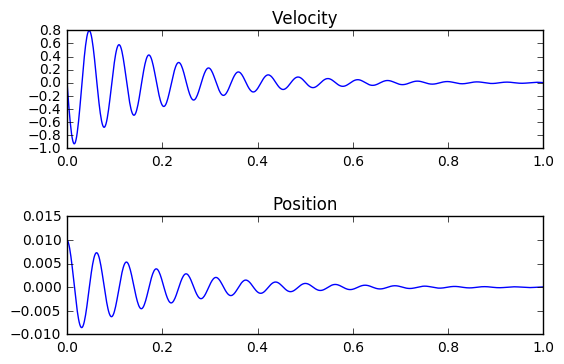

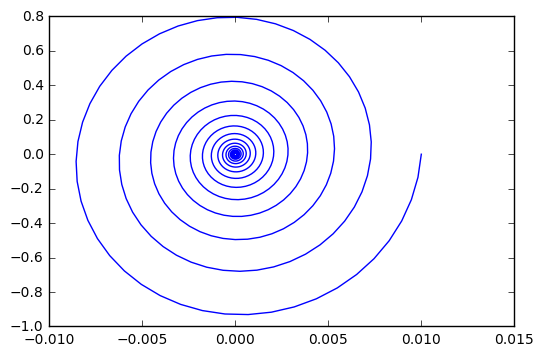

In [4]:
def EulerCromerDamped(tfinal, dt, x0=0.01, v0=0., m=0.1, L=0.1, k=10000.,beta=100):
    '''Euler-Cromer method, takes tfinal (final time), dt (time step), 
    and v0 (initial velocity) as arguments'''
    
    
    print("Linear frequency %2.2f"%(np.sqrt(k/m)))
    print("Number of oscillations per time step: 1/w_osc*dt = %5.3f"%(1./(np.sqrt(k/m)*dt)))
    
    t = 0 # initial time
    x = x0 # initial position (cannot be larger than L)
    if x>L:
        print("x0 cannot be larger than L")
        return [0],[0],[0]
    v = v0 # initial velocity
    a = -k*x/m - beta*v # initial acceleration

    # Set up position, velocity, and time arrays (actually lists, for easy appending), 
    # initially with one entry each:
    time = [t] 
    xpos = [x] 
    xvel = [v]
    xacc = [a]
    
    while t <= tfinal - dt: # Update variables using Eqs. (1) & (2) 
        a = -k*x/m - beta*v #increment acceleration
        v = v + a * dt #increment velocity
        # Note that this uses the *new* v we just defined in prev. step
        x = x + v * dt #increment position
        
        
        # Add updated variables to the lists 
        xvel.append(v) 
        xpos.append(x)
        xacc.append(a)

        # Increment time 
        t = t + dt 
        time.append(t)
        
    return np.array(time),np.array(xpos),np.array(xvel)

t,x,v = EulerCromerDamped(1,0.001341,x0=0.01,k=1000.,beta=10)

#plot results
mp.subplot(2,1,1)
mp.plot(t,v)
mp.title("Velocity")
mp.subplot(2,1,2)
mp.plot(t,x)
mp.title("Position")
mp.tight_layout(pad=2)
mp.show()
mp.plot(x,v,)


Linear frequency 10.00
Number of oscillations per time step: 1/w_osc*dt = 100.000


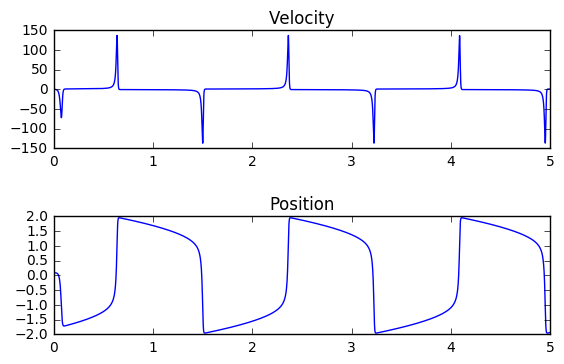

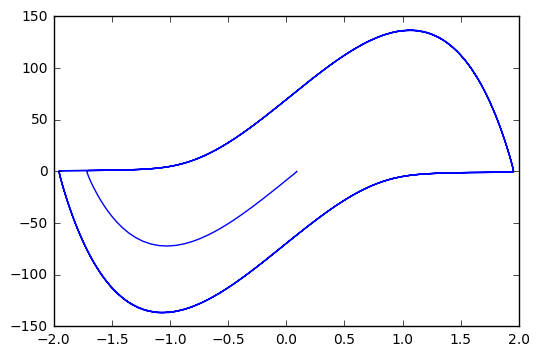

In [5]:
def EulerCromerVanDerPol(tfinal, dt, x0=0.01, v0=0., m=0.1, L=0.1, k=10000.,beta=100):
    '''Euler-Cromer method, takes tfinal (final time), dt (time step), 
    and v0 (initial velocity) as arguments'''
    
    
    print("Linear frequency %2.2f"%(np.sqrt(k/m)))
    print("Number of oscillations per time step: 1/w_osc*dt = %5.3f"%(1./(np.sqrt(k/m)*dt)))
    
    t = 0 # initial time
    x = x0 # initial position (cannot be larger than L)

    v = v0 # initial velocity
    a = -k*x/m + beta*v*(1-(x/L)**2)  # initial acceleration

    # Set up position, velocity, and time arrays (actually lists, for easy appending), 
    # initially with one entry each:
    time = [t] 
    xpos = [x] 
    xvel = [v]
    xacc = [a]
    
    while t <= tfinal - dt: # Update variables using Eqs. (1) & (2) 
        a = -k*x/m + beta*v*(1-(x)**2) #increment acceleration
        v = v + a * dt #increment velocity
        # Note that this uses the *new* v we just defined in prev. step
        x = x + v * dt #increment position
        
        
        # Add updated variables to the lists 
        xvel.append(v) 
        xpos.append(x)
        xacc.append(a)

        # Increment time 
        t = t + dt 
        time.append(t)
        
    return np.array(time),np.array(xpos),np.array(xvel)

t,x,v = EulerCromerVanDerPol(5,0.001,x0=.09,k=10.,beta=100)

#plot results
mp.subplot(2,1,1)
mp.plot(t,v)
mp.title("Velocity")
mp.subplot(2,1,2)
mp.plot(t,x)
mp.title("Position")
mp.tight_layout(pad=2)
mp.show()
mp.plot(x,v,)

Natural frequency 100.00
Number of oscillations per time step: 1/w_osc*dt = 76.923
Linear frequency 1000.00
Number of oscillations per time step: 1/w_osc*dt = 7.692


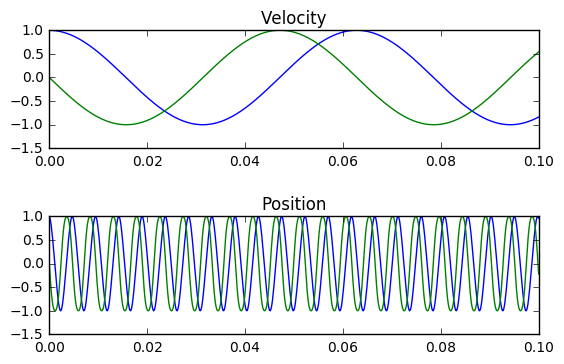

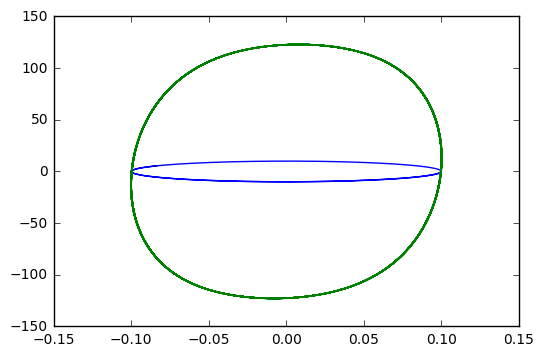

In [6]:
def EulerCromerDuffing(tfinal, dt, x0=0.01, v0=0., L=0.1, w0=1000., beta=100.):
    '''Euler-Cromer method, takes tfinal (final time), dt (time step), 
    and v0 (initial velocity) as arguments'''
    
    
    print("Linear frequency %2.2f"%(w0))
    print("Number of oscillations per time step: 1/w_osc*dt = %5.3f"%(1./(w0*dt)))
    
    t = 0 # initial time
    x = x0 # initial position (cannot be larger than L)
    if x>L:
        print("x0 cannot be larger than L")
        return [0],[0],[0]
    v = v0 # initial velocity
    a = -w0**2*x - w0**2*x*(x/L)**2 # initial acceleration

    # Set up position, velocity, and time arrays (actually lists, for easy appending), 
    # initially with one entry each:
    time = [t] 
    xpos = [x] 
    xvel = [v]
    xacc = [a]
    
    while t <= tfinal - dt: # Update variables using Eqs. (1) & (2) 
        a = -w0**2*x - w0**2*x*(x/L)**2 #increment acceleration
        v = v + a * dt #increment velocity
        # Note that this uses the *new* v we just defined in prev. step
        x = x + v * dt #increment position
        
        
        # Add updated variables to the lists 
        xvel.append(v) 
        xpos.append(x)
        xacc.append(a)

        # Increment time 
        t = t + dt 
        time.append(t)
        
    return np.array(time),np.array(xpos),np.array(xvel)

x0=0.1
t,x,v = EulerCromerSHO(0.1,0.00013,x0=x0,)
tnl,xnl,vnl = EulerCromerDuffing(0.1,0.00013,x0=x0,beta=10)

#plot results
mp.subplot(2,1,1)
mp.plot(t,x/x.max())
mp.plot(t,v/v.max())
mp.title("Velocity")
mp.subplot(2,1,2)
mp.plot(tnl,xnl/xnl.max())
mp.plot(tnl,vnl/vnl.max())
mp.title("Position")
mp.tight_layout(pad=2)
mp.show()
mp.plot(x,v,)
mp.plot(xnl,vnl)

<IPython.core.display.Javascript object>


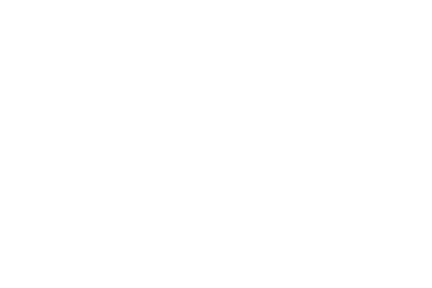

<IPython.core.display.Javascript object>


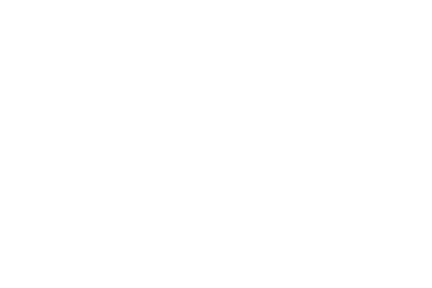

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots()
#ax.axis([0,2*np.pi,-1,1])
l, = ax.plot(xnl,vnl, '-')
ax.lines[0].remove()
l, = ax.plot([],[], '-')

def animate(i):
    l.set_data(xnl[:i], vnl[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(tnl))

In [10]:
ani

RuntimeError: No MovieWriters available!